src:
- https://www.youtube.com/watch?v=jztwpsIzEGc
- https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb

# Dependencies and Setup

In [43]:
import tensorflow as tf

In [44]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [45]:
tf.config.list_physical_devices('GPU')

[]

# Load Data

In [46]:
import numpy as np
from matplotlib import pyplot as plt

In [47]:
path = "../../Database/images"
data = tf.keras.utils.image_dataset_from_directory(path)
class_names = data.class_names

Found 2907 files belonging to 22 classes.


In [48]:
data_iterator = data.as_numpy_iterator()

In [49]:
batch = data_iterator.next()

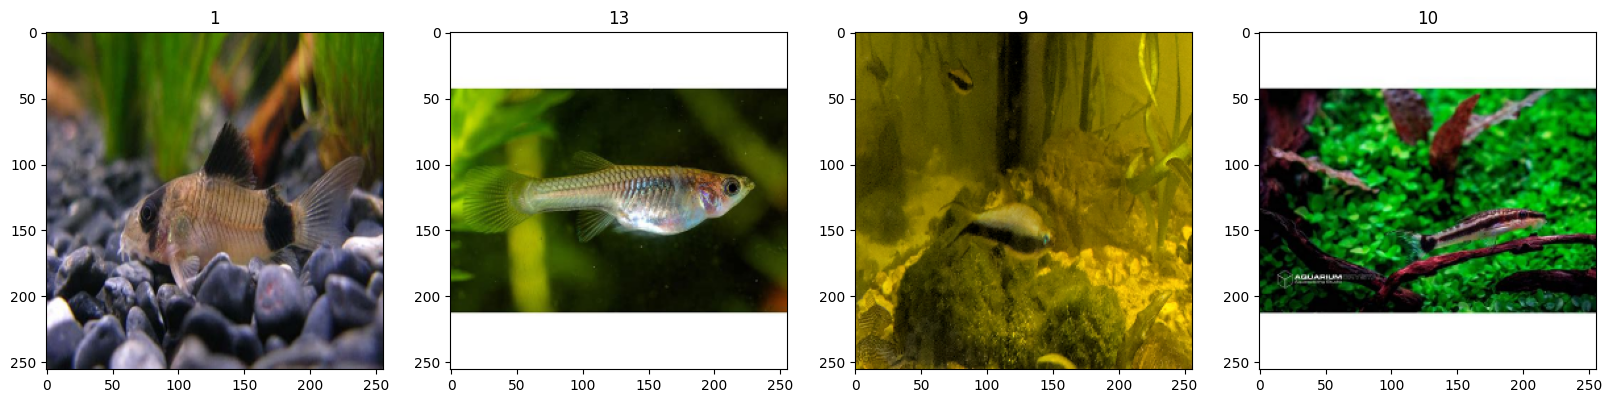

In [50]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [51]:
data = data.map(lambda x,y: (x/255, y))

In [52]:
data.as_numpy_iterator().next()

(array([[[[1.98136926e-01, 2.49117330e-01, 3.15783978e-01],
          [2.28716865e-01, 2.79697239e-01, 3.46363932e-01],
          [2.54172921e-01, 3.05153310e-01, 3.71819973e-01],
          ...,
          [7.79381156e-01, 8.42126250e-01, 9.00949776e-01],
          [8.10700059e-01, 8.73445153e-01, 9.32268679e-01],
          [8.63648891e-01, 9.26393986e-01, 9.77374375e-01]],
 
         [[2.06369773e-01, 2.57350147e-01, 3.24016839e-01],
          [2.22349197e-01, 2.73329586e-01, 3.39996248e-01],
          [2.43327335e-01, 2.94307739e-01, 3.60974401e-01],
          ...,
          [7.72602618e-01, 8.35347712e-01, 8.94171238e-01],
          [8.07391226e-01, 8.70136321e-01, 9.26248491e-01],
          [8.57031226e-01, 9.19776320e-01, 9.70756769e-01]],
 
         [[2.04286188e-01, 2.55266577e-01, 3.21933240e-01],
          [2.11053789e-01, 2.62034178e-01, 3.28700840e-01],
          [2.25742325e-01, 2.76722729e-01, 3.43389392e-01],
          ...,
          [7.66260505e-01, 8.29005599e-01, 8.8782

# Split Data

In [53]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [54]:
train_size

63

In [55]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Extract images and labels

In [56]:
train_images = []
train_labels = []

In [57]:
for images, labels in train:
    train_images.append(images.numpy())  # Append image batch
    train_labels.append(labels.numpy())  # Append label batch

2025-03-12 20:35:41.609757: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [58]:
# Convert lists to numpy arrays
train_images = np.concatenate(train_images, axis=0)  # Concatenate all batches along the first axis (samples)
train_labels = np.concatenate(train_labels, axis=0)

In [59]:
val_images = []
val_labels = []

In [60]:
for images, labels in val:
    val_images.append(images.numpy())  # Append image batch
    val_labels.append(labels.numpy())  # Append label batch

print("val_labels before concatenation:", val_labels)

val_labels before concatenation: [array([ 1,  6,  1,  8, 16, 13,  4, 21,  5, 13, 10,  5,  4, 12,  0, 15, 13,
        4, 19,  3,  7, 12, 14,  6,  0, 16, 11, 11,  9, 13,  8,  9],
      dtype=int32), array([ 3,  1, 11, 19,  1,  0, 15, 18, 11, 16, 15,  4, 21, 11, 16, 17, 16,
       17,  9,  1, 17, 16,  6,  0,  8, 16,  5,  1, 20,  7, 14, 12],
      dtype=int32), array([19, 13,  1,  1, 11, 16,  6,  7, 11,  5,  5, 18,  6,  4, 13,  4,  9,
        8,  1, 21, 17, 17, 11, 16, 13,  1, 17, 19, 12,  4, 21,  6],
      dtype=int32), array([ 2,  3,  6, 11,  1,  9, 15, 15, 13,  5, 16,  9, 15, 12,  3,  4, 19,
       12, 18, 16,  5,  1,  4,  7, 17, 21,  8, 18, 11,  9,  8,  9],
      dtype=int32), array([ 1,  6, 16, 19, 16, 10, 10, 11, 11, 16, 14, 16,  6, 16,  9,  7,  7,
        7,  3, 16, 12, 21, 20,  4,  9,  6,  7, 10, 20, 11, 10, 10],
      dtype=int32), array([12, 20, 21, 12, 12,  7,  2, 11, 11, 18, 12, 14,  1, 10,  9, 16,  9,
       13,  4,  7, 18,  9,  3, 11, 14,  3, 11, 20, 17, 11, 13, 20],
      dt

In [61]:
# Convert lists to numpy arrays
val_images = np.concatenate(val_images, axis=0)  # Concatenate all batches along the first axis (samples)
val_labels = np.concatenate(val_labels, axis=0)

# Build Deep Learning Model

In [62]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [64]:
model = Sequential()

In [65]:
# First convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# Second convolutional layer
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Third convolutional layer
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))

# Output layer for 22 classes
model.add(Dense(22, activation='softmax'))

In [66]:
from tensorflow.keras.utils import to_categorical

In [67]:
# One-hot encode the labels
# One-hot encode the labels
train_labels_one_hot = to_categorical(train_labels, num_classes=22)
val_labels_one_hot = to_categorical(val_labels, num_classes=22)

# Check shapes of the data
print("train_images shape:", train_images.shape)  # (num_train_samples, height, width, channels)
print("train_labels_one_hot shape:", train_labels_one_hot.shape)  # (num_train_samples, 22)
print("val_images shape:", val_images.shape)  # (num_val_samples, height, width, channels)
print("val_labels_one_hot shape:", val_labels_one_hot.shape)  # (num_val_samples, 22)

train_images shape: (2016, 256, 256, 3)
train_labels_one_hot shape: (2016, 22)
val_images shape: (576, 256, 256, 3)
val_labels_one_hot shape: (576, 22)


In [68]:
# Compile the model with categorical crossentropy
model.compile(optimizer='adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,702,022 (14.12 MB)

 Trainable params: 3,702,022 (14.12 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [70]:
logdir='logs'

In [71]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [72]:
hist = model.fit(train_images, train_labels_one_hot, epochs=20,
                 validation_data=(val_images, val_labels_one_hot),
                 callbacks=[tensorboard_callback])


Epoch 1/20


2025-03-12 20:35:45.996332: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1585446912 exceeds 10% of free system memory.


63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 390ms/step - accuracy: 0.1225 - loss: 3.0298 - val_accuracy: 0.1424 - val_loss: 2.9007
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 386ms/step - accuracy: 0.3010 - loss: 2.4937 - val_accuracy: 0.3472 - val_loss: 2.4215
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 393ms/step - accuracy: 0.5755 - loss: 1.4903 - val_accuracy: 0.4392 - val_loss: 2.1549
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 385ms/step - accuracy: 0.8051 - loss: 0.7362 - val_accuracy: 0.4740 - val_loss: 2.4779
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 387ms/step - accuracy: 0.9282 - loss: 0.2766 - val_accuracy: 0.4931 - val_loss: 2.8193
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 387ms/step - accuracy: 0.9612 - loss: 0.1470 - val_accuracy: 0.4792 - val_loss: 3.1619
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 385ms/step - accuracy: 0.9710 - loss: 0.1319 - val_accuracy: 0.4740 - val_loss: 3.6456
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 388ms/step - accuracy: 0.9876 - loss: 0.1161 - val_accuracy: 0.463

# Plot Performance

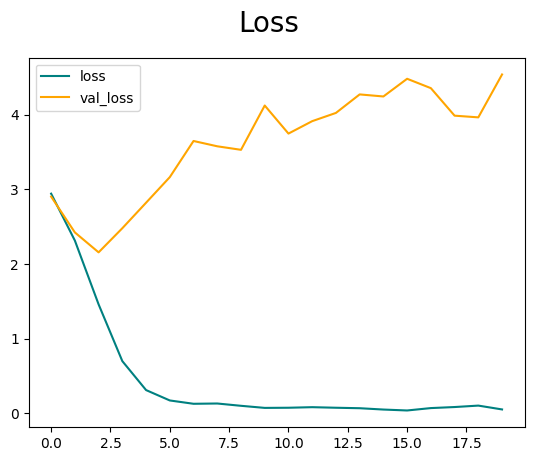

In [73]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

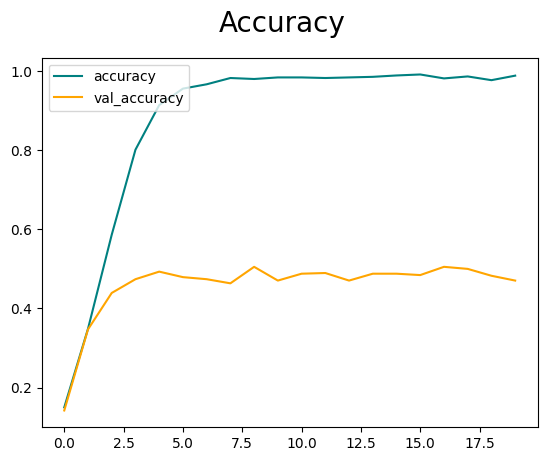

In [74]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [75]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [76]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [77]:
# Iterate over test dataset
for batch in test.as_numpy_iterator():
    X, y = batch

    # Ensure `y` is one-hot encoded
    y_one_hot = to_categorical(y, num_classes=22)  # Convert labels to one-hot

    # Get model predictions
    yhat = model.predict(X)

    # Update metrics
    pre.update_state(y_one_hot, yhat)  # Use one-hot encoded labels
    re.update_state(y_one_hot, yhat)   # Use one-hot encoded labels
    acc.update_state(y_one_hot, yhat)  # Use one-hot encoded labels

# Print final metric values
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Precision: 0.42629483342170715
Recall: 0.3715277910232544
Accuracy: 0.40625


# Test

In [78]:
import cv2

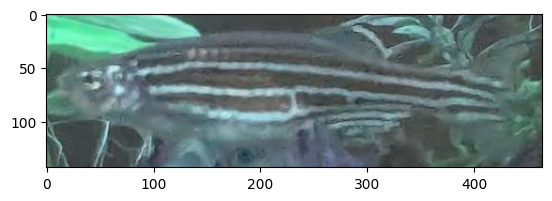

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class is: Danio_rerio


In [94]:
img = cv2.imread('test_pictures/Danio_rerio.jpeg')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))

plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

# Get predicted class index
predicted_class = np.argmax(yhat)  # Get the index of the highest probability

# Print the predicted class
print(f'Predicted class is: {class_names[predicted_class]}')

# Save the Model